In [1]:
from sklearn.datasets import load_linnerud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

data = load_linnerud()
data

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [2]:
df_features = data.feature_names
df_features

['Chins', 'Situps', 'Jumps']

In [3]:
df_data = pd.DataFrame(data.data, columns = df_features)
df_data

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [4]:
df_labels = pd.DataFrame(data.target, columns = ['Weight', 'Waist', 'Pulse'])
df_labels

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0
5,182.0,36.0,56.0
6,211.0,38.0,56.0
7,167.0,34.0,60.0
8,176.0,31.0,74.0
9,154.0,33.0,56.0


In [5]:
data = pd.concat([df_data, df_labels], axis=1)
data

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [6]:
data.columns

Index(['Chins', 'Situps', 'Jumps', 'Weight', 'Waist', 'Pulse'], dtype='object')

In [7]:
df2 = pd.concat([data['Chins'], data['Situps'], data['Jumps'], data['Waist']], axis=1)
df2

,Chins,Situps,Jumps,Waist
0,5.0,162.0,60.0,36.0
1,2.0,110.0,60.0,37.0
2,12.0,101.0,101.0,38.0
3,12.0,105.0,37.0,35.0
4,13.0,155.0,58.0,35.0
5,4.0,101.0,42.0,36.0
6,8.0,101.0,38.0,38.0
7,6.0,125.0,40.0,34.0
8,15.0,200.0,40.0,31.0
9,17.0,251.0,250.0,33.0


In [14]:
#Splitting the data into training and test test
X = df2.iloc[:,0:3].values
y = df2.iloc[:,3].values



In [15]:
X

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [13]:
y

array([36., 37., 38., 35., 35., 36., 38., 34., 31., 33., 34., 33., 34.,
       46., 36., 37., 37., 32., 33., 33.])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [18]:
# 전처리, 표준화
# minmax normalization : x = (x - min) / (max - min) => x / max
# robust normalization : x = (x - 중간값) / (3분위값 - 1분위값)
# standardization : x = x-mean / std

import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (3,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [20]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.1158 - mse: 0.1158 - val_loss: 0.1017 - val_mse: 0.1017
Epoch 2/100
1/1 [==============================] - 0s 59ms/step - loss: 0.1021 - mse: 0.1021 - val_loss: 0.1012 - val_mse: 0.1012
Epoch 3/100
1/1 [==============================] - 0s 54ms/step - loss: 0.1009 - mse: 0.1009 - val_loss: 0.0995 - val_mse: 0.0995
Epoch 4/100
1/1 [==============================] - 0s 57ms/step - loss: 0.1001 - mse: 0.1001 - val_loss: 0.1009 - val_mse: 0.1009
Epoch 5/100
1/1 [==============================] - 0s 54ms/step - loss: 0.0995 - mse: 0.0995 - val_loss: 0.1000 - val_mse: 0.1000
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0992 - mse: 0.0992 - val_loss: 0.1008 - val_mse: 0.1008
Epoch 7/100
1/1 [==============================] - 0s 55ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 8/100
1/1 [==============================] - 0s 51ms/step - loss: 0.0990 - mse: 0.0990

1/1 [==============================] - 0s 55ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 64/100
1/1 [==============================] - 0s 51ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 0.1026 - val_mse: 0.1026
Epoch 65/100
1/1 [==============================] - 0s 57ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 66/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 0.1027 - val_mse: 0.1027
Epoch 67/100
1/1 [==============================] - 0s 51ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 0.1002 - val_mse: 0.1002
Epoch 68/100
1/1 [==============================] - 0s 51ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 69/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 70/100
1/1 [==============================] - 0s 54ms/step - loss: 0.0991 - mse: 0.0991 - 

In [21]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 26ms/step - loss: 0.1028 - mse: 0.1028


[0.10276371240615845, 0.10276371240615845]

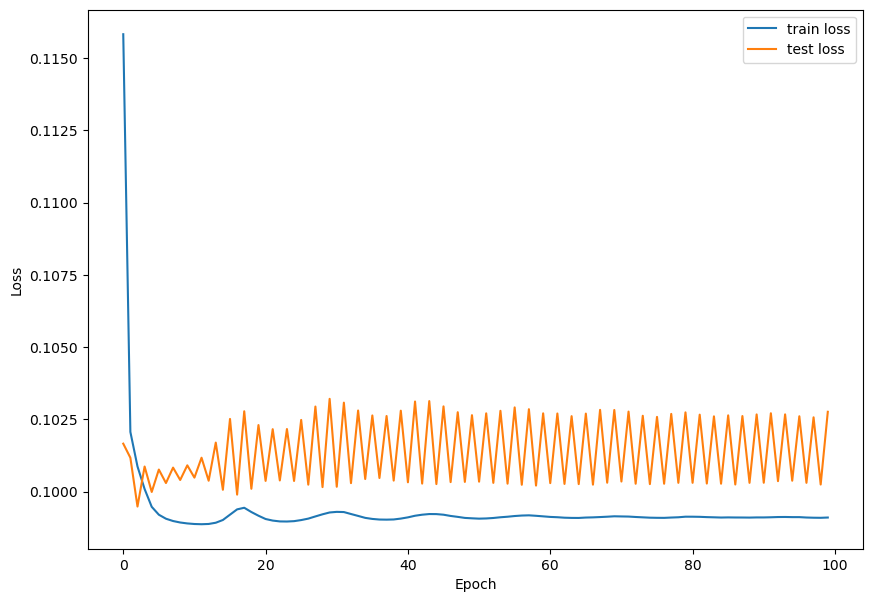

In [22]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

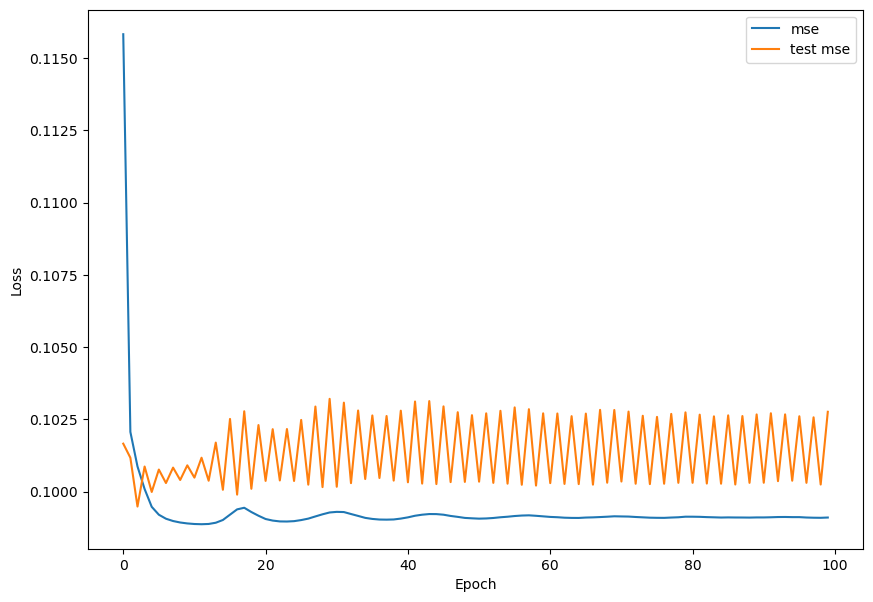

In [23]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()